# Support Vector Classifier

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2023-12-29 03:14:43 +06:00)



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
datasets=[]
for i in range(0,56):
  df=pd.read_csv(f'../ProcessedDatasets/dataset{i}.csv')
  datasets.append(df)

time: 45.4 s (started: 2023-12-29 03:15:36 +06:00)


In [ ]:
for i in range(len(datasets)):
  datasets[i]=datasets[i].drop(['filename','Unnamed: 0'],axis=1)

time: 563 ms (started: 2023-12-29 03:16:33 +06:00)


In [ ]:
models=[]
for i in range(len(datasets)):
  models.append(make_pipeline(StandardScaler(), SVC(kernel='rbf')))

time: 0 ns (started: 2023-12-29 03:16:34 +06:00)


In [ ]:
X_train=[]
y_train=[]
X_val=[]
y_val=[]

time: 16 ms (started: 2023-12-29 03:16:35 +06:00)


In [ ]:
for i in range(len(datasets)):
  X=datasets[i].drop(['Bug Present'],axis=1).values
  y=datasets[i]['Bug Present'].values
  x_tr1,x_te1,y_tr1,y_te1=train_test_split(X,y,test_size=0.2,random_state=42)
  X_train.append(x_tr1)
  y_train.append(y_tr1)
  X_val.append(x_te1)
  y_val.append(y_te1)

time: 2.33 s (started: 2023-12-29 03:16:40 +06:00)


In [ ]:
progress=0
for i in range(len(datasets)):
  models[i].fit(X_train[i],y_train[i])
  progress+=1
  print("Progress: ",progress/len(datasets)*100)

Progress:  1.7857142857142856
Progress:  3.571428571428571
Progress:  5.357142857142857
Progress:  7.142857142857142
Progress:  8.928571428571429
Progress:  10.714285714285714
Progress:  12.5
Progress:  14.285714285714285
Progress:  16.071428571428573
Progress:  17.857142857142858
Progress:  19.642857142857142
Progress:  21.428571428571427
Progress:  23.214285714285715
Progress:  25.0
Progress:  26.785714285714285
Progress:  28.57142857142857
Progress:  30.357142857142854
Progress:  32.142857142857146
Progress:  33.92857142857143
Progress:  35.714285714285715
Progress:  37.5
Progress:  39.285714285714285
Progress:  41.07142857142857
Progress:  42.857142857142854
Progress:  44.642857142857146
Progress:  46.42857142857143
Progress:  48.214285714285715
Progress:  50.0
Progress:  51.78571428571429
Progress:  53.57142857142857
Progress:  55.35714285714286
Progress:  57.14285714285714
Progress:  58.92857142857143
Progress:  60.71428571428571
Progress:  62.5
Progress:  64.28571428571429
Progr

# Performance Metrics

In [ ]:
y_Pred=[]
for i in range(len(datasets)):
  y_Pred.append(models[i].predict(X_val[i]))

time: 1h 13min 12s (started: 2023-12-29 13:57:00 +06:00)


In [ ]:
from sklearn.metrics import accuracy_score

time: 15 ms (started: 2023-12-29 15:10:12 +06:00)


In [ ]:
accuracy=[]
for i in range(len(datasets)):
  accuracy.append(accuracy_score(y_Pred[i],y_val[i]))
print("Accuracy on Validation Set: ",sum(accuracy)/len(datasets)*100,"%")

Accuracy on Validation Set:  72.81709104996885 %
time: 125 ms (started: 2023-12-29 15:10:12 +06:00)


In [ ]:
test_set=pd.read_csv(f'../ProcessedDatasets/dataset56.csv')
test_set=test_set.drop(['filename','Unnamed: 0'],axis=1)
progress=0
X_test,y_test=test_set.drop(['Bug Present'],axis=1).values,test_set['Bug Present'].values
y_test_pred=[]
for i in range(len(datasets)):
    print(progress)
    y_pred=models[i].predict(X_test)
    y_test_pred.append(y_pred)
    progress+=1
    print(progress/len(datasets)*100)




0
1.7857142857142856
1
3.571428571428571
2
5.357142857142857
3
7.142857142857142
4
8.928571428571429
5
10.714285714285714
6
12.5
7
14.285714285714285
8
16.071428571428573
9
17.857142857142858
10
19.642857142857142
11
21.428571428571427
12
23.214285714285715
13
25.0
14
26.785714285714285
15
28.57142857142857
16
30.357142857142854
17
32.142857142857146
18
33.92857142857143
19
35.714285714285715
20
37.5
21
39.285714285714285
22
41.07142857142857
23
42.857142857142854
24
44.642857142857146
25
46.42857142857143
26
48.214285714285715
27
50.0
28
51.78571428571429
29
53.57142857142857
30
55.35714285714286
31
57.14285714285714
32
58.92857142857143
33
60.71428571428571
34
62.5
35
64.28571428571429
36
66.07142857142857
37
67.85714285714286
38
69.64285714285714
39
71.42857142857143
40
73.21428571428571
41
75.0
42
76.78571428571429
43
78.57142857142857
44
80.35714285714286
45
82.14285714285714
46
83.92857142857143
47
85.71428571428571
48
87.5
49
89.28571428571429
50
91.07142857142857
51
92.85714285

In [ ]:
result = []
y_test_pred=np.array(y_test_pred)
for column in y_test_pred.T:
    most_common = np.bincount(column).argmax()
    result.append(most_common)

result = np.array(result)

time: 156 ms (started: 2023-12-29 21:39:35 +06:00)


In [ ]:
result

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

time: 16 ms (started: 2023-12-29 21:39:37 +06:00)


In [ ]:
print("Accuracy on Test Set: ", accuracy_score(result,y_test)*100)

Accuracy on Test Set:  71.06531649353562
time: 16 ms (started: 2023-12-29 21:39:39 +06:00)


In [ ]:
from sklearn.metrics import roc_curve,auc

time: 0 ns (started: 2023-12-29 21:39:41 +06:00)


In [ ]:
fpr,tpr, _ = roc_curve(y_test, result)
roc_auc = auc(fpr,tpr)

time: 16 ms (started: 2023-12-29 21:39:43 +06:00)


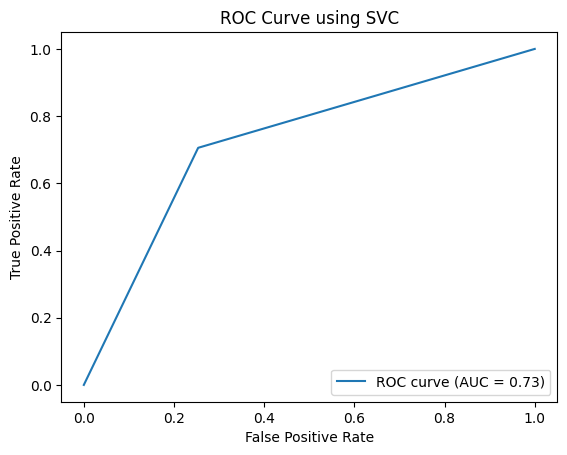

time: 641 ms (started: 2023-12-29 21:39:45 +06:00)


In [ ]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using SVC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 343 ms (started: 2023-12-29 21:39:48 +06:00)


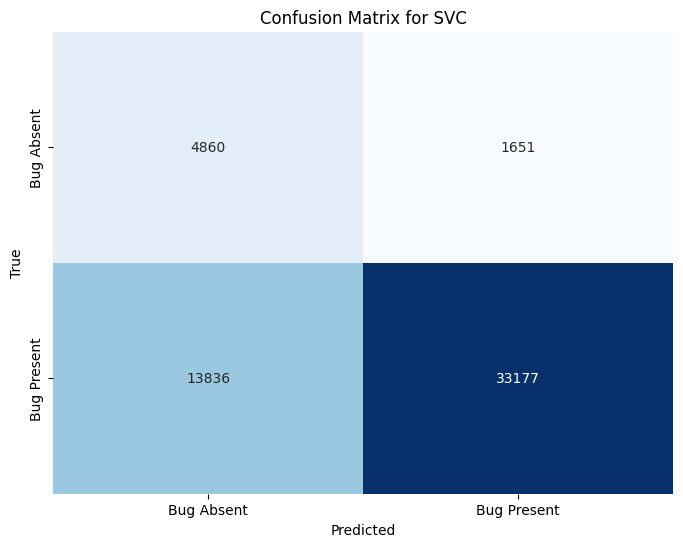

time: 94 ms (started: 2023-12-29 21:39:50 +06:00)


In [ ]:
confusion=confusion_matrix(y_test,result)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Bug Absent', 'Bug Present'], yticklabels=['Bug Absent', 'Bug Present'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC')

plt.show()

In [ ]:
!pip install joblib


time: 3.14 s (started: 2023-12-29 21:39:52 +06:00)



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
joblib.dump(models, '/content/drive/MyDrive/CSE_4554_MachineLearning/xgboost_model.joblib')

NameError: name 'joblib' is not defined

time: 47 ms (started: 2023-12-29 21:39:58 +06:00)
